<a href="https://colab.research.google.com/github/romellfudi/ExploratoryDataAnalysis/blob/master/Peru%20Al%20Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext watermark
%watermark -a "Romell D.Z." -u -d -p pandas,numpy,seaborn,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Romell D.Z. 
last updated: 2020-10-02 

pandas 1.1.2
numpy 1.18.5
seaborn 0.11.0
matplotlib 3.2.2


# Peru road to Russia World Cup 2018
![world-cup-18](https://github.com/romellfudi/ExploratoryDataAnalysis/blob/master/snapshot/fifa_world_cup_2018.jpg?raw=1)

In [ ]:
# Cargamos las librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Formateamos una vista legible
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preprocessing FIFA DATA
## Load Data from [SOFIFA]

[SOFIFA]: <https://sofifa.com>

In [ ]:
# Data públicada en Enero en Kaggle
FIFA18 = pd.read_csv('CompleteDataset.csv', low_memory=False)
FIFA18.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Indicamos los features a trabajar, dejando a un lado el resto

In [ ]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)

## Summarize Data

In [ ]:
%load_ext google.colab.data_table
# Vista de la data
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [ ]:
# Descripción de los features
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Preferred Positions  17981 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


## Preprocess Data
Cambiamos los vaores de "Value" & "Wage", extrayendo los miles y millones, tienendo los valores numéricos. Los cuales son almacenados en nuevos features 'ValueNum' y 'WageNum'.

In [ ]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

Sintetizamos el feature 'Preferred  Positions' extrayendo únicamente el primer cáracter, omitiendo así la doble posición del jugador

In [ ]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

Seleccionamos el Grupo donde se encuentra nuestro Perú, Grupo C : \['Francia','Dinamarca','Perú','Australia'\].

In [ ]:
GroupC = FIFA18[FIFA18.Nationality.isin(['France','Denmark','Peru','Australia'])]

Extraemos las medias de los salarios por nacionalidad para el GrupoC

In [ ]:
GroupC_Average = FIFA18.groupby('Nationality').agg({'ValueNum':np.mean,'WageNum':np.mean})
GroupC_Average = GroupC_Average.reindex(['France','Denmark','Peru','Australia'])
GroupC_Average

,ValueNum,WageNum
Nationality,,
France,3.340557e+06,14279.141104
Denmark,1.596257e+06,7202.312139
Peru,2.178167e+06,6500.000000
Australia,7.339868e+05,4114.537445


# Data Visualization
## Age

Visualizamos las edades por un histograma.

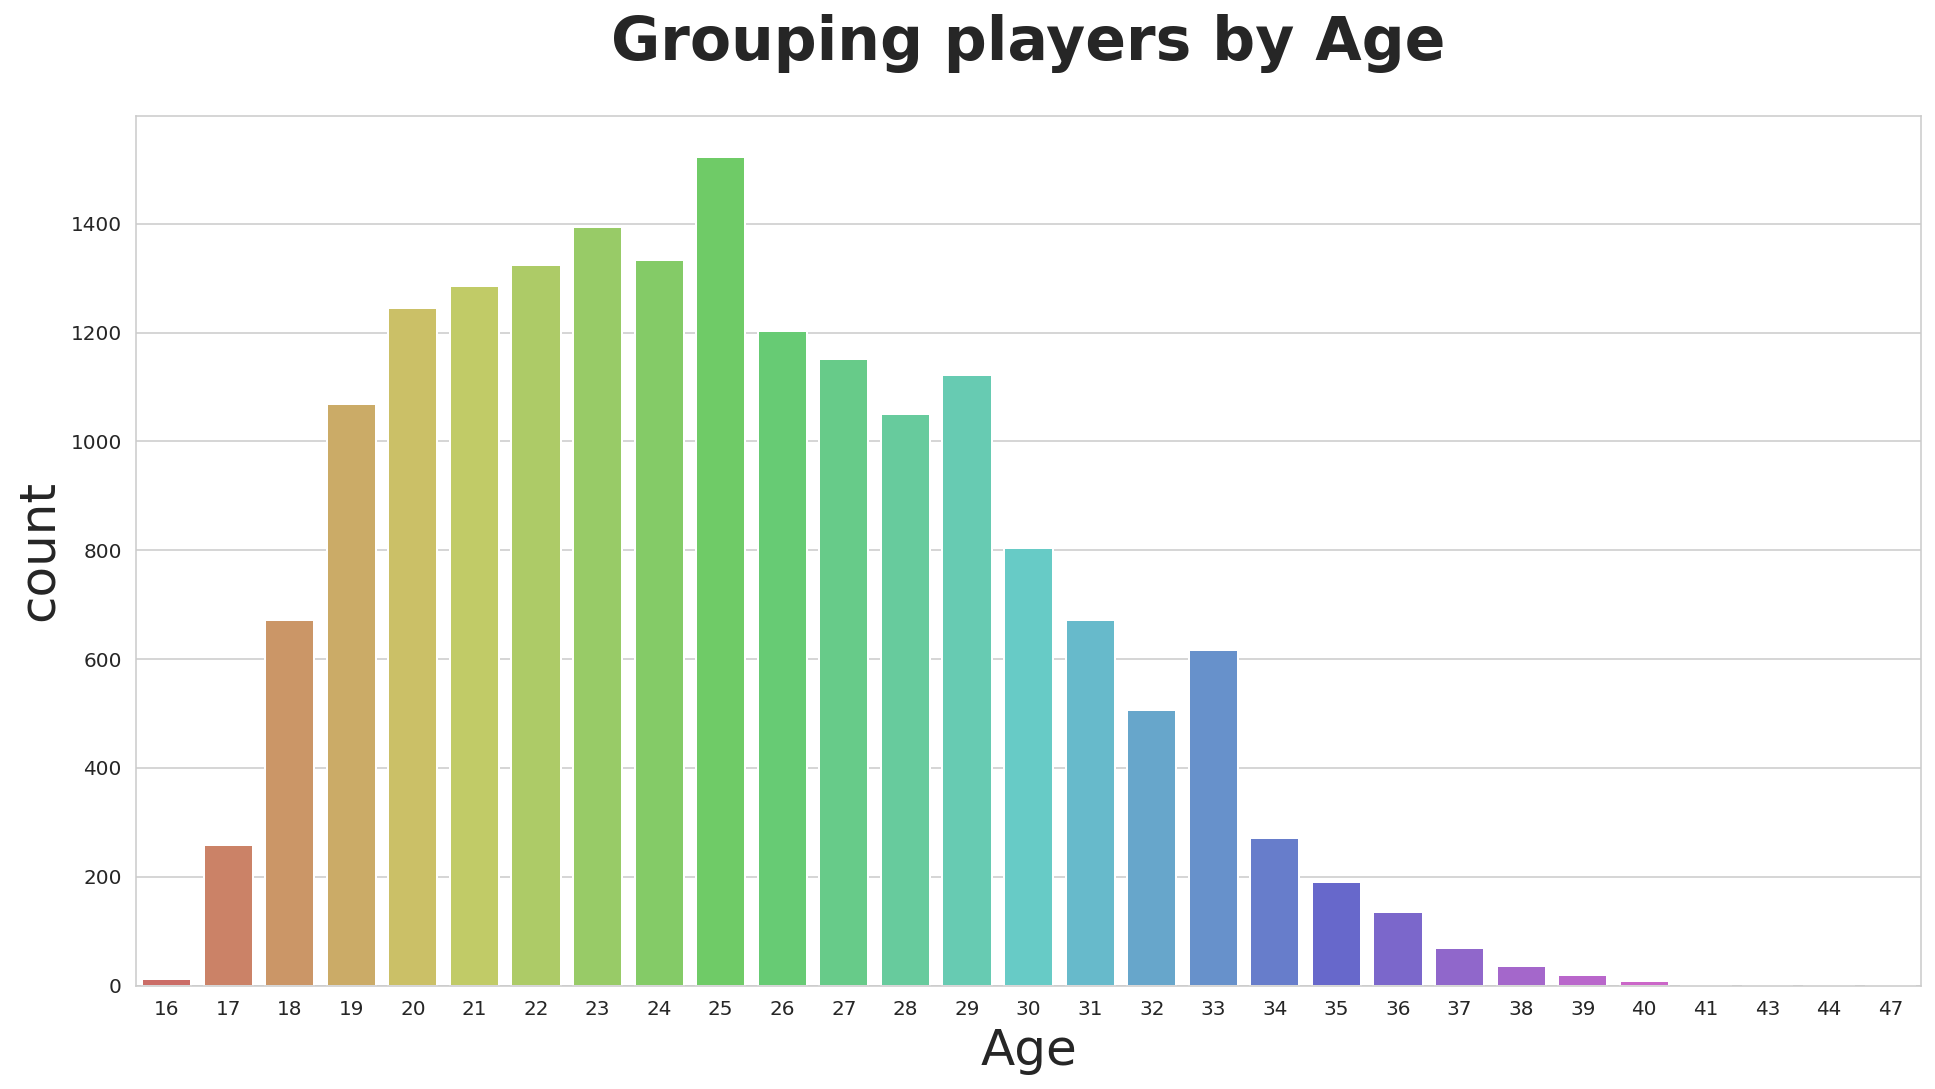

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()

## Monto Acomulado (Miles de €)

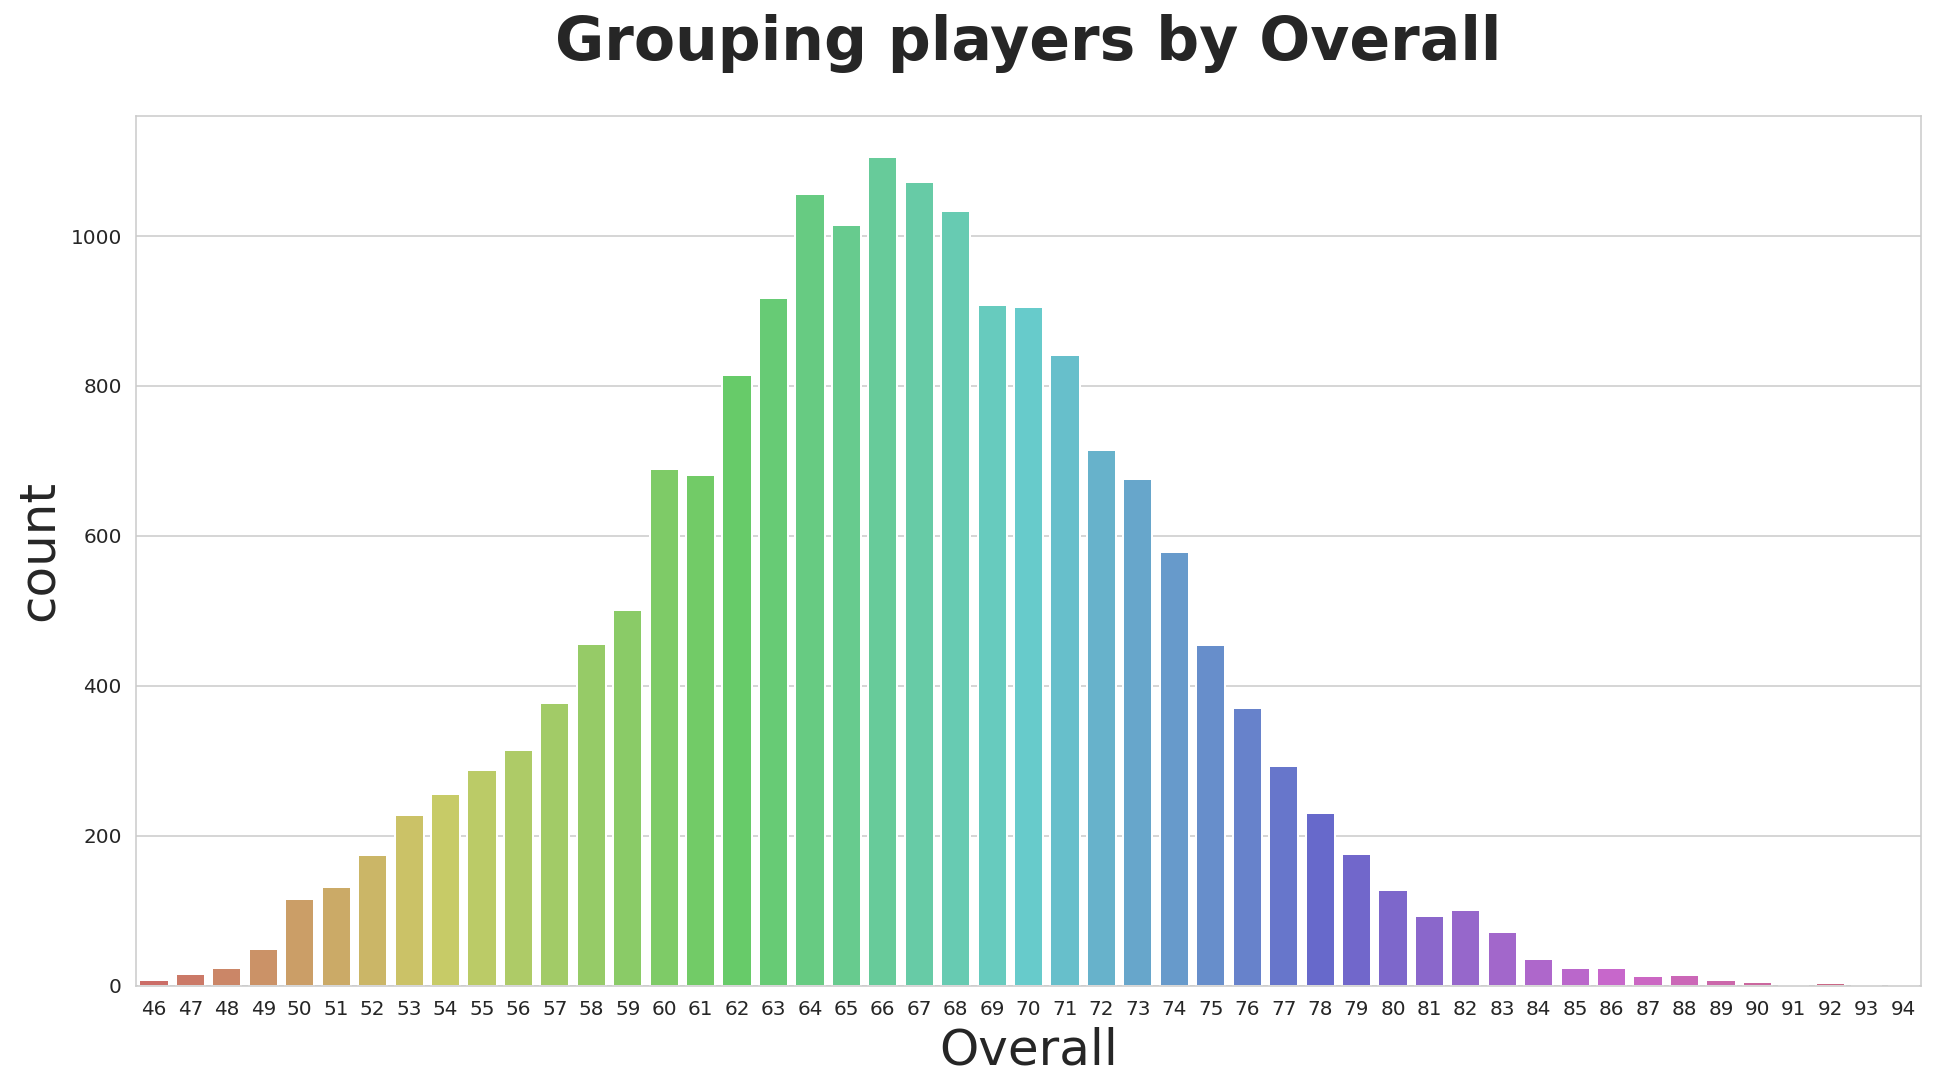

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

## Preferred Position

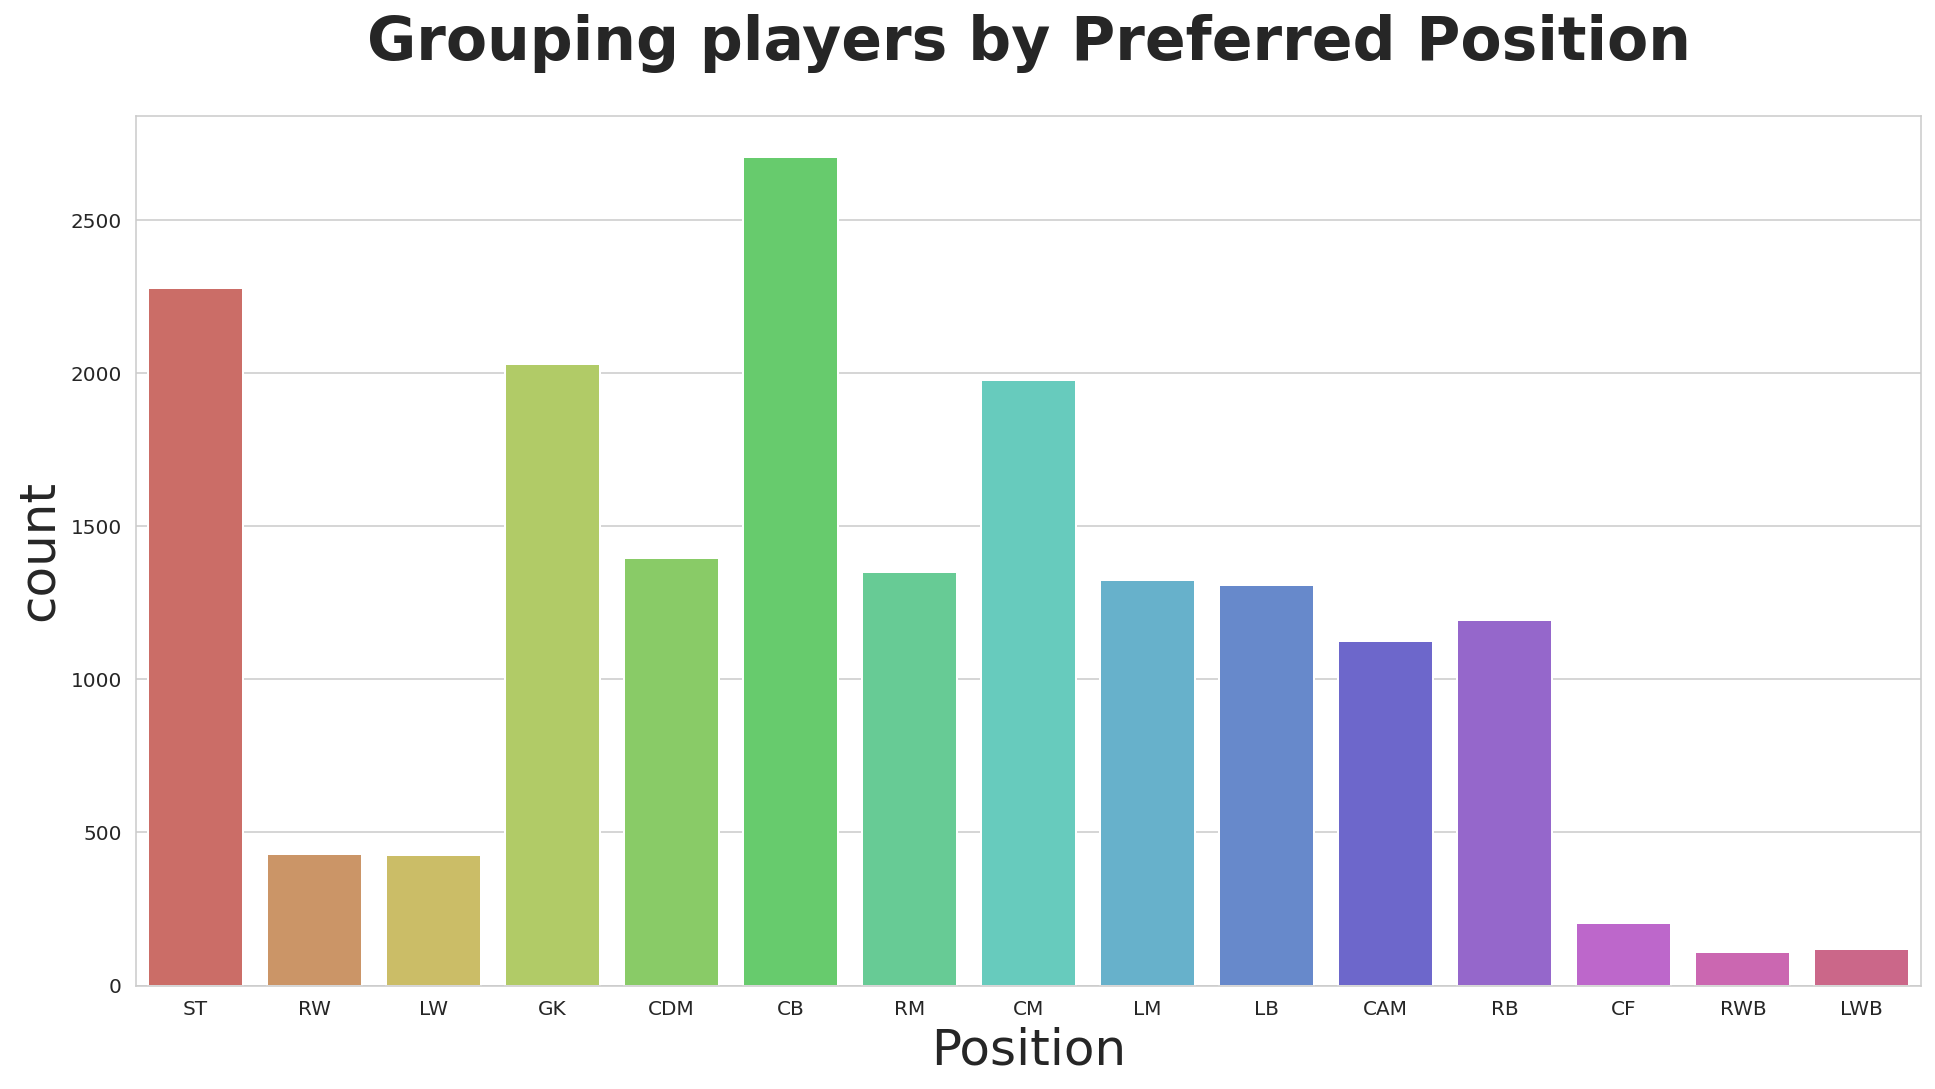

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA18, palette="hls");
plt.show()

## Nationality

In [ ]:
FIFA18["Nationality"].value_counts().head(25)

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Name: Nationality, dtype: int64

Podemos destacar que una gran cantidad se centraliza en Europa, especialmente en Inglaterra, Alemania, España y Francia

## Value
Buscamos y listamos a los 20 jugadores que más cobran Netamente

In [ ]:
sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].reset_index(drop=True)

,Name,Age,Nationality,Club,Position,Value
0,Neymar,25,Brazil,Paris Saint-Germain,LW,€123M
1,L. Messi,30,Argentina,FC Barcelona,RW,€105M
2,L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
3,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
4,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
5,E. Hazard,26,Belgium,Chelsea,LW,€90.5M
6,K. De Bruyne,26,Belgium,Manchester City,RM,€83M
7,T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
8,P. Dybala,23,Argentina,Juventus,ST,€79M
9,G. Higuaín,29,Argentina,Juventus,ST,€77M


Realizamos una vista de disperción de la valoración del jugador por sus edades e ingresos:

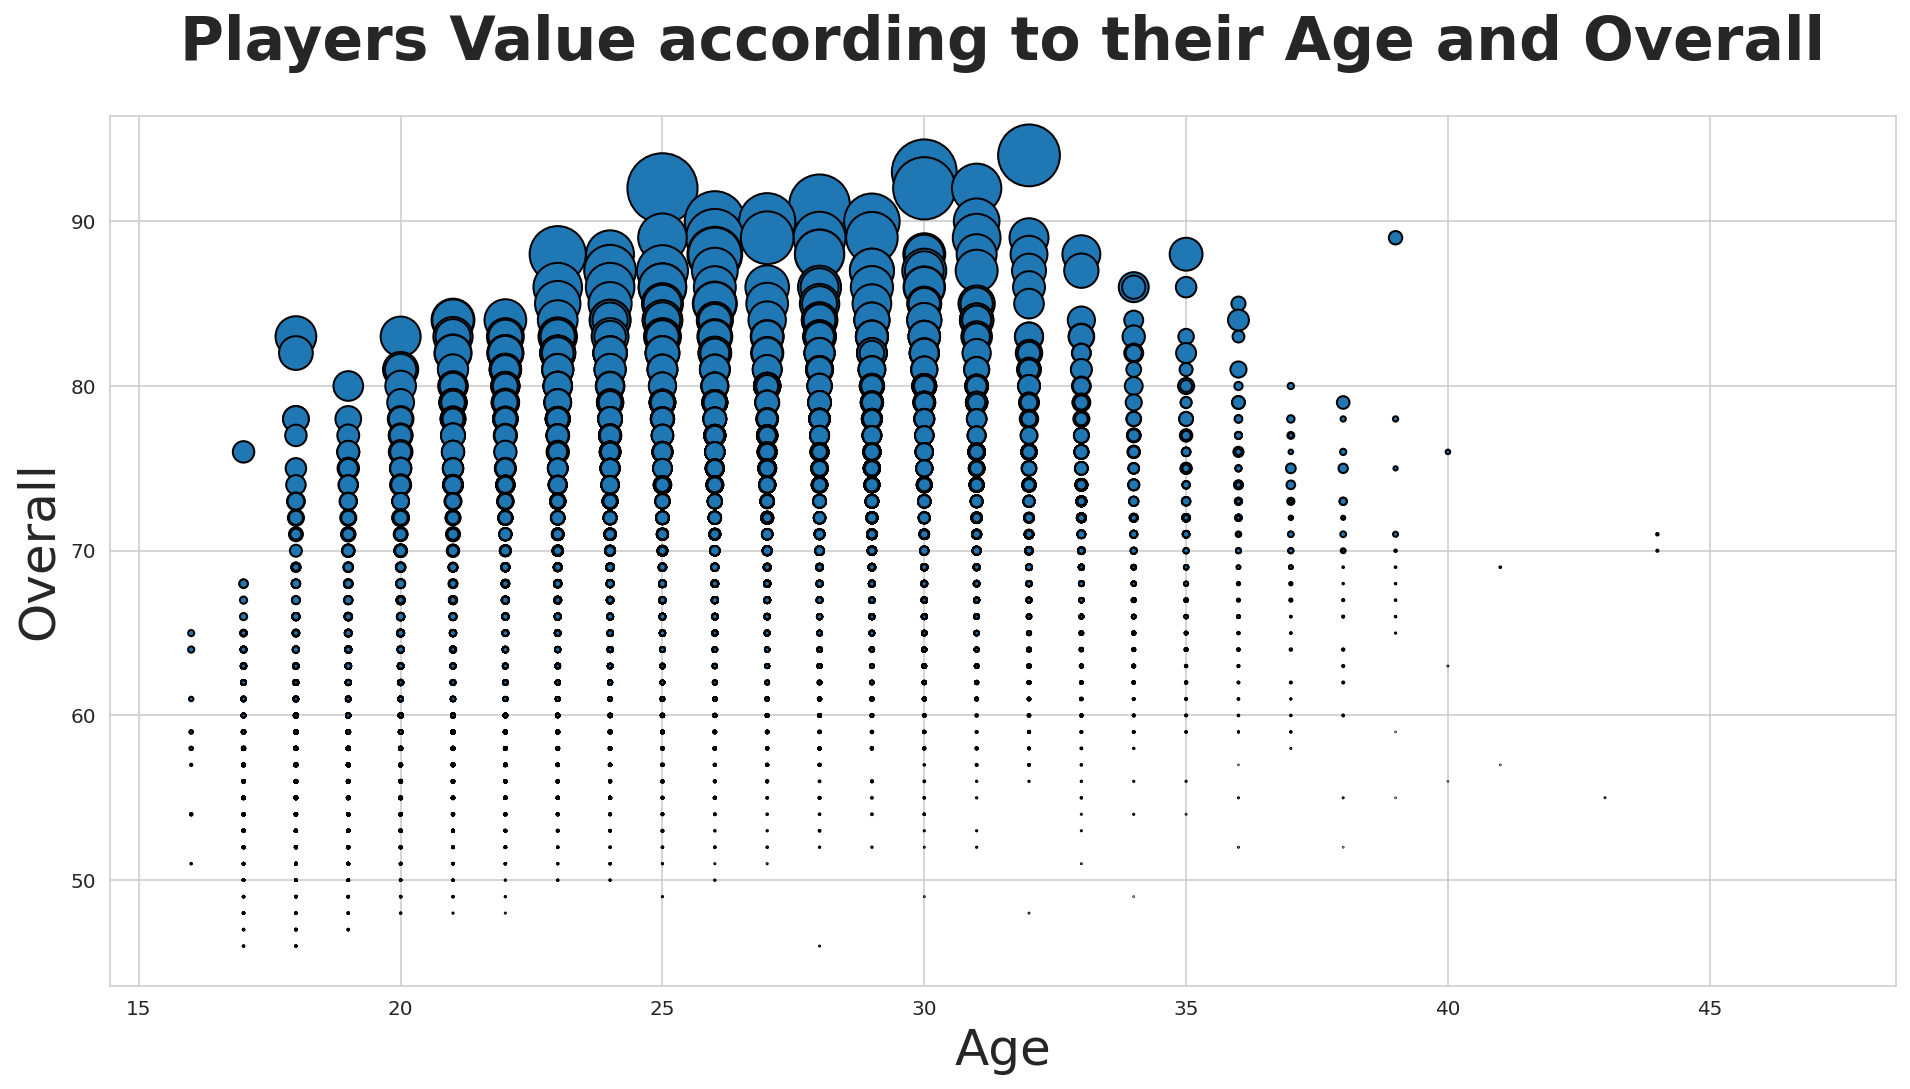

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["ValueNum"].values

# Subdividimos los millones para tener una vista legible mediante el área de la ganancia
plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 2.6 Wage
Listamos a los 20 jugadores con más recaudación.

In [ ]:
sorted_players = FIFA18.sort_values(["WageNum"], ascending=False).head(20)
sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].reset_index(drop=True)

,Name,Age,Nationality,Club,Position,Wage
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€565K
1,L. Messi,30,Argentina,FC Barcelona,RW,€565K
2,L. Suárez,30,Uruguay,FC Barcelona,ST,€510K
3,G. Bale,27,Wales,Real Madrid CF,RW,€370K
4,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€355K
5,L. Modrić,31,Croatia,Real Madrid CF,CDM,€340K
6,T. Kroos,27,Germany,Real Madrid CF,CDM,€340K
7,S. Agüero,29,Argentina,Manchester City,ST,€325K
8,Sergio Ramos,31,Spain,Real Madrid CF,CB,€310K
9,E. Hazard,26,Belgium,Chelsea,LW,€295K


Realizamos una vista de disperción de ingresos del jugador por sus edades y Valoración:

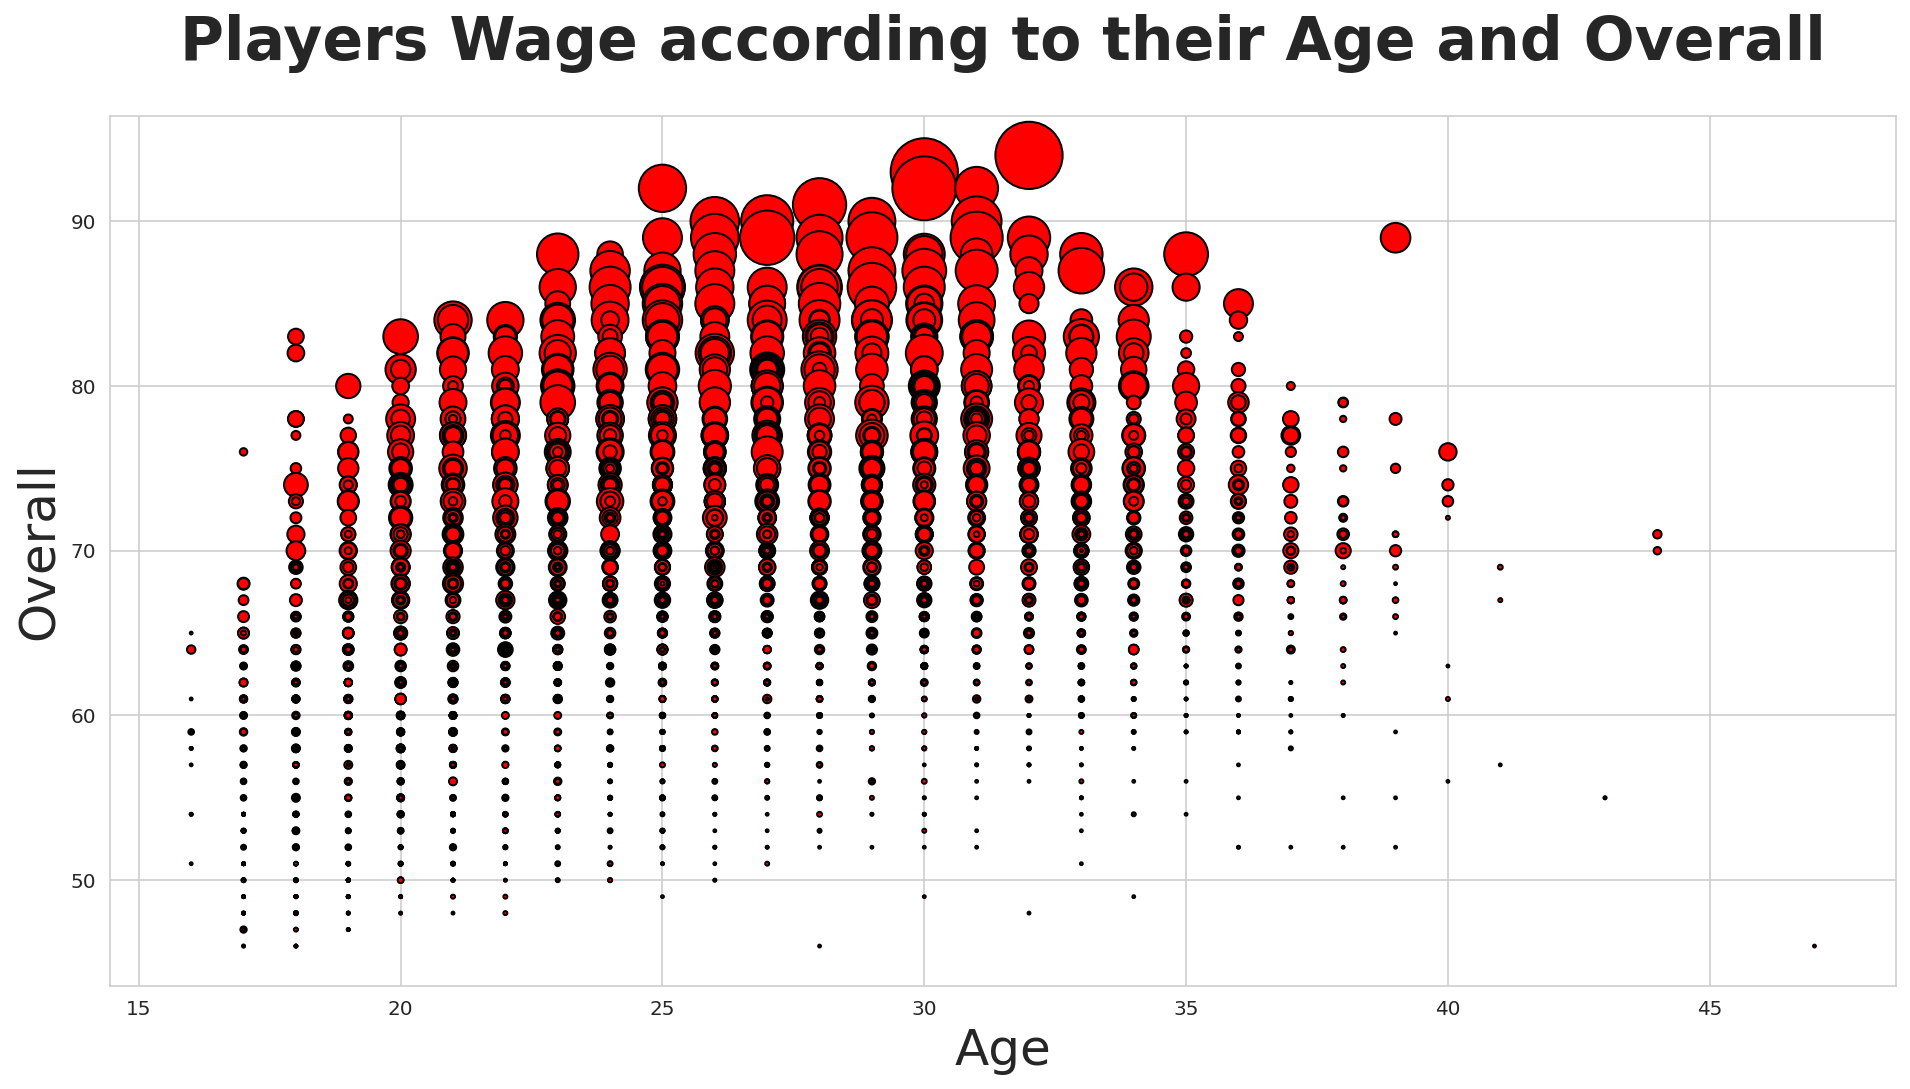

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

## 3 - Best Squad Analysis
Seleccionamos una vista más simplee de los jugadores: Nombre, Edad, Nacionalidad, Valoración, Potencial, Club al que actualmente pertenece(puede estar en blanco),Posición, Recaudación, y Salario.

In [ ]:
FIFA18 = FIFA18[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA18.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,ST,€95.5M,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,RW,€105M,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,LW,€123M,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,€97M,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,€61M,€230K
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,ST,€92M,€355K
6,De Gea,26,Spain,90,92,Manchester United,GK,€64.5M,€215K
7,E. Hazard,26,Belgium,90,91,Chelsea,LW,€90.5M,€295K
8,T. Kroos,27,Germany,90,90,Real Madrid CF,CDM,€79M,€340K
9,G. Higuaín,29,Argentina,90,90,Juventus,ST,€77M,€275K


### 3.1 Squad of Highest Overall Players
Cúal es la mejor formación deacuerdo a base de hechos de la FIFA?

In [ ]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage'])

In [ ]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
get_best_squad(squad_433))

4-3-3
   Position              Player Overall  ...                  Club    Value    Wage
0        GK            M. Neuer      92  ...      FC Bayern Munich     €61M   €230K
1        RB            Carvajal      84  ...        Real Madrid CF     €32M   €195K
2        CB        Sergio Ramos      90  ...        Real Madrid CF     €52M   €310K
3        CB        G. Chiellini      89  ...              Juventus     €38M   €225K
4        LB             Marcelo      87  ...        Real Madrid CF     €38M   €250K
5       CDM            T. Kroos      90  ...        Real Madrid CF     €79M   €340K
6        CM            N. Kanté      87  ...               Chelsea   €52.5M   €190K
7       CAM            Coutinho      86  ...             Liverpool     €56M   €205K
8        RW            L. Messi      93  ...          FC Barcelona    €105M   €565K
9        ST   Cristiano Ronaldo      94  ...        Real Madrid CF   €95.5M   €565K
10       LW              Neymar      92  ...   Paris Saint-Germain    

In [ ]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
get_best_squad(squad_442)

4-4-2


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,M. Neuer,92,31,FC Bayern Munich,€61M,€230K
1,RB,Carvajal,84,25,Real Madrid CF,€32M,€195K
2,CB,Sergio Ramos,90,31,Real Madrid CF,€52M,€310K
3,CB,G. Chiellini,89,32,Juventus,€38M,€225K
4,LB,Marcelo,87,29,Real Madrid CF,€38M,€250K
5,RM,K. De Bruyne,89,26,Manchester City,€83M,€285K
6,CM,N. Kanté,87,26,Chelsea,€52.5M,€190K
7,CM,A. Vidal,87,30,FC Bayern Munich,€37.5M,€160K
8,LM,C. Eriksen,87,25,Tottenham Hotspur,€65M,€165K
9,ST,Cristiano Ronaldo,94,32,Real Madrid CF,€95.5M,€565K


In [ ]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
get_best_squad(squad_4231)

4-2-3-1


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,M. Neuer,92,31,FC Bayern Munich,€61M,€230K
1,RB,Carvajal,84,25,Real Madrid CF,€32M,€195K
2,CB,Sergio Ramos,90,31,Real Madrid CF,€52M,€310K
3,CB,G. Chiellini,89,32,Juventus,€38M,€225K
4,LB,Marcelo,87,29,Real Madrid CF,€38M,€250K
5,CDM,T. Kroos,90,27,Real Madrid CF,€79M,€340K
6,CDM,L. Modrić,89,31,Real Madrid CF,€57M,€340K
7,CAM,Coutinho,86,25,Liverpool,€56M,€205K
8,CAM,R. Nainggolan,86,29,Roma,€42.5M,€130K
9,CAM,Cesc Fàbregas,86,30,Chelsea,€41M,€210K


Ahora, veamos diferentes posiciones para distintos features.

In [ ]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage'])

In [ ]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

Para cada formación indicamos la mejor estratégia, sin violar las reglas fundamentales del juego. Ejm: 1 portero, etc,etc.

In [ ]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [ ]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

# 3 Group C

## 3.1 France

Extramos diferentes posiciónes que pueden generarse para Francia, juntamente con el promedio que generan y sus ratings.

In [ ]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

France

,Squad,Overall,Potential
Nationality,,,
France,3-4-3,84.55,89.55
France,4-4-2,84.00,89.91
France,4-3-1-2,84.55,89.64
France,4-3-3,84.64,89.91
France,4-2-3-1,84.55,89.91


Veamos, la mejor estratégia para Francia sería usar 4-3-3; mientra que las estratégias 4-4-2, and 4-2-3-1 son las que le siguen en dicho orden. Los mejores 11 con una estratégia 4-3-3 brinda actualmente sus mejores partidos hasta la fecha, pero mientras una alineación 4-4-2 le brinda mayor potencial máximo.

In [ ]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
best_list_433_FR_Overall

-Overall-
Average rating: 84.6


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,H. Lloris,88,30,Tottenham Hotspur,€38M,€165K
1,RB,K. Zouma,79,22,Stoke City,€15M,€96K
2,CB,R. Varane,85,24,Real Madrid CF,€46.5M,€175K
3,CB,A. Laporte,84,23,Athletic Club de Bilbao,€35.5M,€36K
4,LB,L. Kurzawa,80,24,Paris Saint-Germain,€16.5M,€69K
5,CM,N. Kanté,87,26,Chelsea,€52.5M,€190K
6,CDM,P. Pogba,87,24,Manchester United,€66.5M,€195K
7,CM,B. Matuidi,85,30,Juventus,€28.5M,€145K
8,RM,F. Thauvin,82,24,Olympique de Marseille,€28M,€40K
9,ST,K. Benzema,86,29,Real Madrid CF,€44.5M,€295K


In [ ]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
best_list_442_FR_Potential

-Potential-
Average rating: 89.9


,Position,Player,Potential,Age,Club,Value,Wage
0,GK,A. Lafont,89,18,Toulouse FC,€11.5M,€10K
1,RB,K. Zouma,86,22,Stoke City,€15M,€96K
2,CB,R. Varane,92,24,Real Madrid CF,€46.5M,€175K
3,CB,A. Laporte,89,23,Athletic Club de Bilbao,€35.5M,€36K
4,LB,L. Hernández,88,21,Atlético Madrid,€13.5M,€36K
5,RM,A. Pléa,86,24,OGC Nice,€20.5M,€41K
6,CDM,P. Pogba,92,24,Manchester United,€66.5M,€195K
7,CAM,O. Dembélé,92,20,FC Barcelona,€40M,€150K
8,LM,T. Lemar,91,21,AS Monaco,€38.5M,€37K
9,ST,K. Mbappé,94,18,Paris Saint-Germain,€41.5M,€31K


![griezmann](https://github.com/romellfudi/ExploratoryDataAnalysis/blob/master/snapshot/griezmann.jpeg?raw=1)

## 3.2 Denmark
Extramos diferentes posiciónes que pueden generarse para Dinamarca, juntamente con el promedio que generan y sus ratings.

In [ ]:
Denmark = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Denmark'])).reshape(-1,4),
                       columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Denmark.set_index('Nationality', inplace = True)
Denmark[['Overall', 'Potential']] = Denmark[['Overall', 'Potential']].astype(float)

Denmark

,Squad,Overall,Potential
Nationality,,,
Denmark,3-4-3,79.09,83.36
Denmark,4-4-2,79.27,84.18
Denmark,4-3-1-2,78.73,83.09
Denmark,4-3-3,79.55,84.27
Denmark,4-2-3-1,79.55,84.18


Como podemos apreciar tenemos dos picos de estratégias, la formación 4-2-3-1 o 4-3-3; usando el feature 'Potential', podemos indicar que su mejor es usar 4-3-3. La cual indica que nuestro mejor score en general es 79.55, con un potencial máximo de 84.27

In [ ]:
rating_433_DEN_Overall, best_list_433_DEN_Overall = get_best_squad_n(squad_433_strict, 'Denmark', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Overall))
best_list_433_DEN_Overall

-Overall-
Average rating: 79.5


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,K. Schmeichel,83,30,Leicester City,€19M,€65K
1,RB,F. Sørensen,77,25,1. FC Köln,€9.5M,€33K
2,CB,S. Kjær,81,28,Sevilla FC,€16M,€23K
3,CB,J. Vestergaard,79,24,Borussia Mönchengladbach,€14.5M,€36K
4,LWB,R. Durmisi,73,23,Real Betis Balompié,€4.7M,€18K
5,CDM,A. Christensen,81,21,Chelsea,€23M,€86K
6,CAM,D. Wass,80,28,RC Celta de Vigo,€14.5M,€33K
7,CM,M. Krohn-Dehli,79,34,Sevilla FC,€6.5M,€24K
8,RM,L. Andersen,76,22,Grasshopper Club Zürich,€11M,€21K
9,ST,N. Jørgensen,79,26,Feyenoord,€15.5M,€25K


In [ ]:
rating_433_DEN_Potential, best_list_433_DEN_Potential = get_best_squad_n(squad_433_strict, 'Denmark', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_DEN_Potential))
best_list_433_DEN_Potential

-Potential-
Average rating: 84.3


,Position,Player,Potential,Age,Club,Value,Wage
0,GK,K. Schmeichel,84,30,Leicester City,€19M,€65K
1,RB,F. Sørensen,81,25,1. FC Köln,€9.5M,€33K
2,CB,J. Vestergaard,84,24,Borussia Mönchengladbach,€14.5M,€36K
3,CB,S. Kjær,82,28,Sevilla FC,€16M,€23K
4,LWB,R. Durmisi,80,23,Real Betis Balompié,€4.7M,€18K
5,CDM,A. Christensen,89,21,Chelsea,€23M,€86K
6,CAM,K. Dolberg,88,19,Ajax,€16.5M,€10K
7,CAM,V. Fischer,82,23,1. FSV Mainz 05,€9.5M,€23K
8,RM,L. Andersen,83,22,Grasshopper Club Zürich,€11M,€21K
9,ST,Y. Poulsen,83,23,RB Leipzig,€11M,€58K


![schmeichel](https://github.com/romellfudi/ExploratoryDataAnalysis/blob/master/snapshot/schmeichel.jpg?raw=1)

## 3.3 Peru
Extramos diferentes posiciónes que pueden generarse para Perú, juntamente con el promedio que generan y sus ratings.

In [ ]:
Peru = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Peru'])).reshape(-1,4),
                    columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Peru.set_index('Nationality', inplace = True)
Peru[['Overall', 'Potential']] = Peru[['Overall', 'Potential']].astype(float)

Peru

,Squad,Overall,Potential
Nationality,,,
Peru,3-4-3,73.09,75.91
Peru,4-4-2,73.91,76.27
Peru,4-3-1-2,71.82,75.36
Peru,4-3-3,73.09,76.09
Peru,4-2-3-1,72.91,76.09


Para nuestro Perú, tenemos con una puntuación general la formación 4-4-2 . De la misma forma su potencial se inclina ccon 76.27 sobre la media, seleccionando como esta la mejor formación que hoy en día cuenta.

In [ ]:
rating_442_PER_Overall, best_list_442_PER_Overall = get_best_squad_n(squad_442_strict, 'Peru', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_442_PER_Overall))
best_list_442_PER_Overall

-Overall-
Average rating: 73.9


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,P. Gallese,74,27,NaN,€0,€0
1,RWB,R. Revoredo,70,31,NaN,€0,€0
2,CB,C. Zambrano,76,27,PAOK Thessaloniki,€7.5M,€1K
3,CB,A. Rodríguez,73,33,NaN,€0,€0
4,LB,Y. Yotún,71,27,Orlando City Soccer Club,€2.7M,€7K
5,RM,P. Hurtado,76,26,Vitória Guimarães,€8.5M,€14K
6,CDM,R. Tapia,72,21,Feyenoord,€4.2M,€9K
7,CAM,Y. Reyna,70,23,Vancouver Whitecaps FC,€2.4M,€6K
8,LM,A. Carrillo,77,26,Watford,€10.5M,€15K
9,ST,J. Farfán,78,32,Lokomotiv Moscow,€8M,€45K


In [ ]:
rating_442_PER_Potential, best_list_442_PER_Potential = get_best_squad_n(squad_442_strict, 'Peru', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_PER_Potential))
best_list_442_PER_Potential

-Potential-
Average rating: 76.3


,Position,Player,Potential,Age,Club,Value,Wage
0,GK,P. Gallese,76,27,NaN,€0,€0
1,RWB,R. Revoredo,70,31,NaN,€0,€0
2,CB,C. Zambrano,78,27,PAOK Thessaloniki,€7.5M,€1K
3,CB,A. Callens,78,25,New York City Football Club,€3.6M,€6K
4,LB,Y. Yotún,72,27,Orlando City Soccer Club,€2.7M,€7K
5,RM,A. Polo,79,22,Monarcas Morelia,€1.7M,€6K
6,CDM,R. Tapia,78,21,Feyenoord,€4.2M,€9K
7,CAM,Y. Reyna,75,23,Vancouver Whitecaps FC,€2.4M,€6K
8,LM,A. Carrillo,78,26,Watford,€10.5M,€15K
9,ST,J. Farfán,78,32,Lokomotiv Moscow,€8M,€45K


Pondré una foto del Capitan a pesar que no este en esta data ;)
![paolo](https://github.com/romellfudi/ExploratoryDataAnalysis/blob/master/snapshot/paolo.jpg?raw=1)

## 3.5 Australia
Extramos diferentes posiciónes que pueden generarse para Australia, juntamente con el promedio que generan y sus ratings.

In [ ]:
Australia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Australia'])).reshape(-1,4), 
                      columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Australia.set_index('Nationality', inplace = True)
Australia[['Overall', 'Potential']] = Australia[['Overall', 'Potential']].astype(float)

Australia

,Squad,Overall,Potential
Nationality,,,
Australia,3-4-3,72.73,77.18
Australia,4-4-2,73.00,77.09
Australia,4-3-1-2,73.73,77.64
Australia,4-3-3,73.55,77.36
Australia,4-2-3-1,73.27,77.36


De forma similar Australia tiene un score general de 73.55 con la formación 4-3-3 actualmente, por otro lado el potencial máximo que puede alcanzar usando una formación 4-2-3-1 es de 77.90

In [ ]:
rating_433_AU_Overall, best_list_433_AU_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_AU_Overall))
best_list_433_AU_Overall

-Overall-
Average rating: 85.5


,Position,Player,Overall,Age,Club,Value,Wage
0,GK,Ederson,83,23,Manchester City,€26M,€87K
1,RB,Dani Alves,84,34,Paris Saint-Germain,€9M,€115K
2,CB,Thiago Silva,88,32,Paris Saint-Germain,€34M,€175K
3,CB,David Luiz,86,30,Chelsea,€33M,€190K
4,LB,Marcelo,87,29,Real Madrid CF,€38M,€250K
5,CDM,Casemiro,85,25,Real Madrid CF,€42M,€195K
6,CAM,Coutinho,86,25,Liverpool,€56M,€205K
7,CAM,Willian,84,28,Chelsea,€31.5M,€200K
8,RM,Douglas Costa,82,26,Juventus,€24M,€115K
9,CF,Jonas,83,33,SL Benfica,€16.5M,€21K


In [ ]:
rating_4312_AU_Potential, best_list_4312_AU_Potential = get_best_squad_n(squad_4312_strict, 'Australia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4312_AU_Potential))
best_list_4312_AU_Potential

-Potential-
Average rating: 77.6


,Position,Player,Potential,Age,Club,Value,Wage
0,GK,M. Ryan,80,25,Brighton & Hove Albion,€8M,€36K
1,RB,A. Behich,76,26,Bursaspor,€4.1M,€17K
2,CB,T. Sainsbury,77,25,NaN,€0,€0
3,CB,B. Wright,77,24,Bristol City,€2.8M,€23K
4,LB,A. Gersbach,79,20,Rosenborg BK,€1.3M,€4K
5,CM,A. O'Neill,80,18,Fleetwood Town,€925K,€8K
6,CAM,A. Mooy,78,26,Huddersfield Town,€10.5M,€52K
7,CAM,T. Rogić,77,24,Celtic,€7M,€42K
8,CAM,D. De Silva,77,20,Central Coast Mariners,€875K,€1K
9,ST,J. Maclaren,77,23,SV Darmstadt 98,€5.5M,€23K


![paolo](https://github.com/romellfudi/ExploratoryDataAnalysis/blob/master/snapshot/langerak.jpg?raw=1)

## 4 - Final Comparison

A continuación muestro mediante barrras las puntuciones totales y potencial máximo, para tener una mejor panorama.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


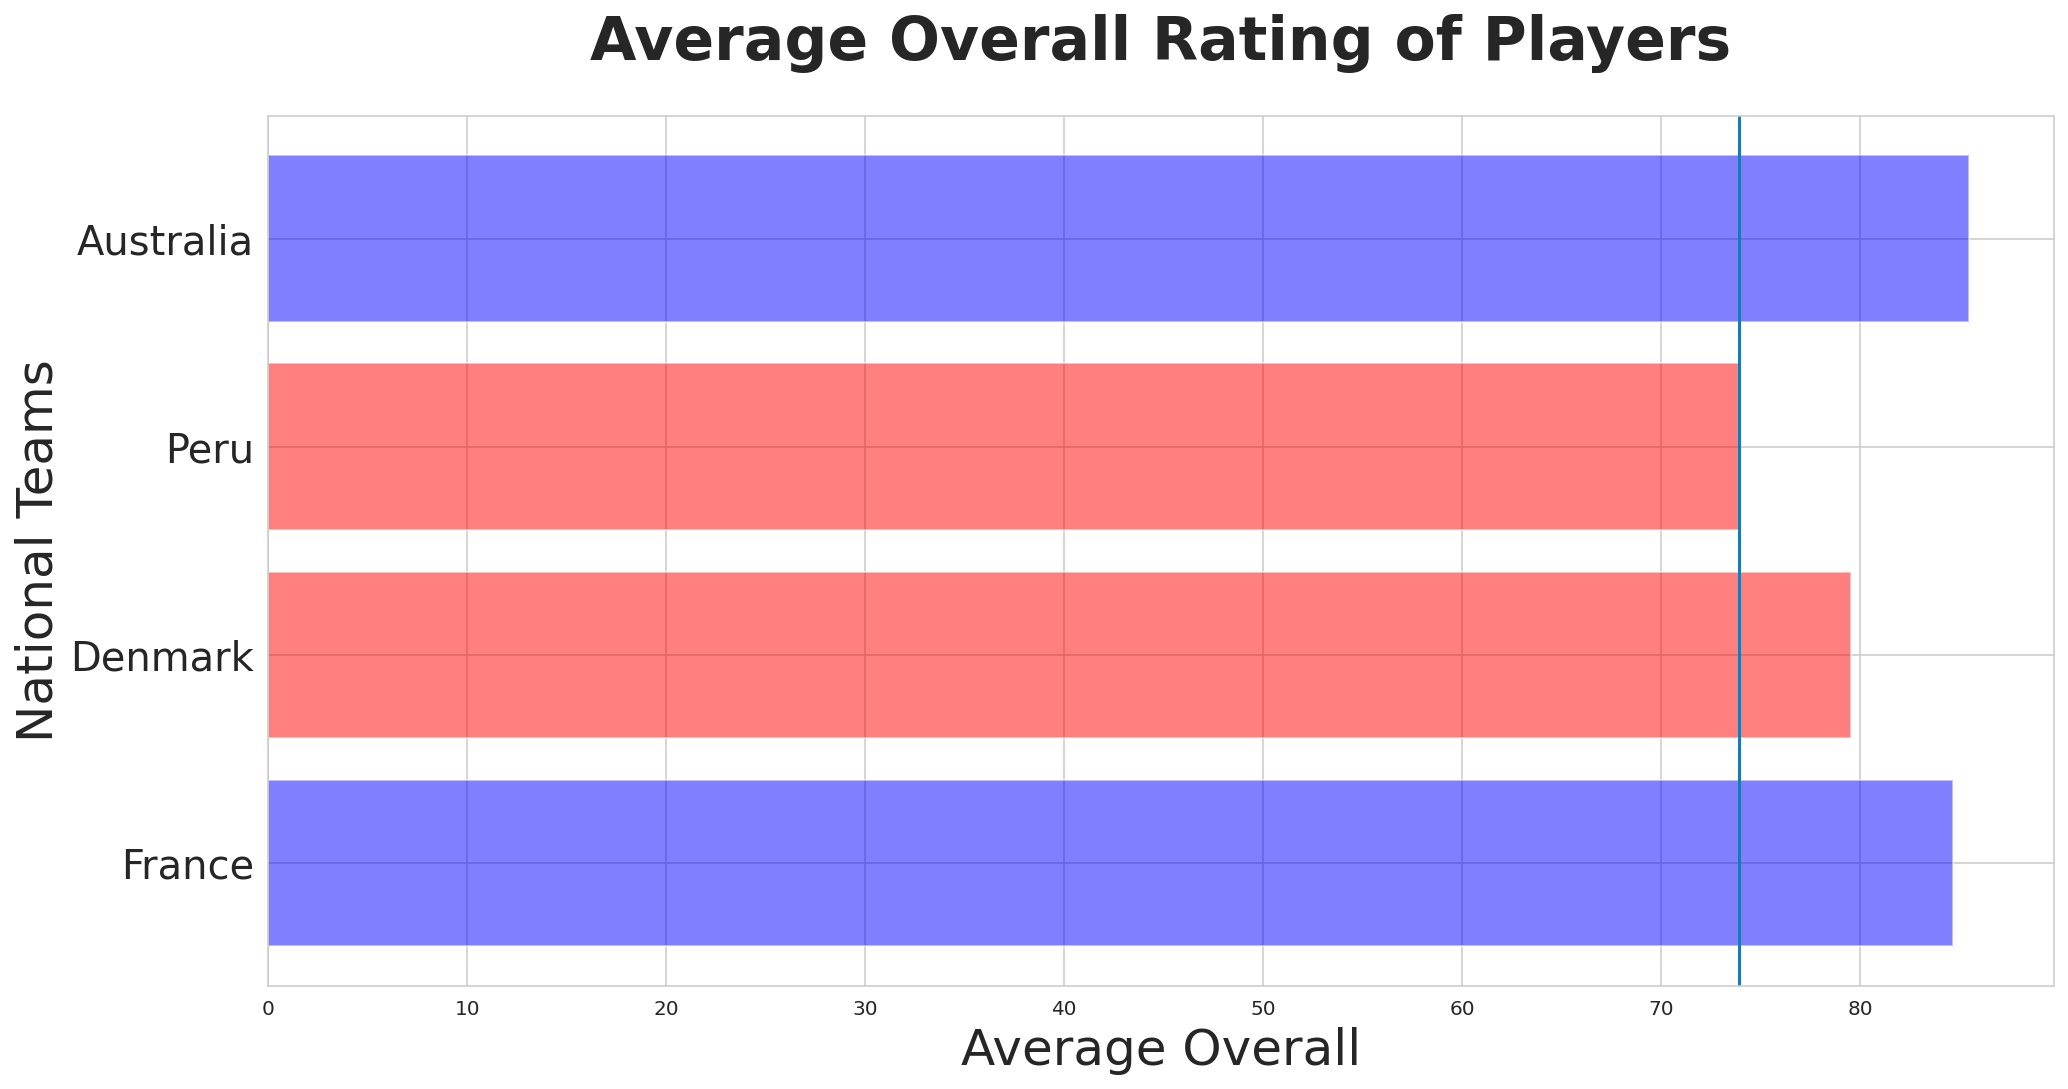

In [ ]:
teams = ('France', 'Denmark', 'Peru', 'Australia')
index = np.arange(len(teams))
average_overall = [rating_433_FR_Overall, rating_433_DEN_Overall, rating_442_PER_Overall,rating_433_AU_Overall]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5,color='brrb')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.axvline(rating_442_PER_Overall)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


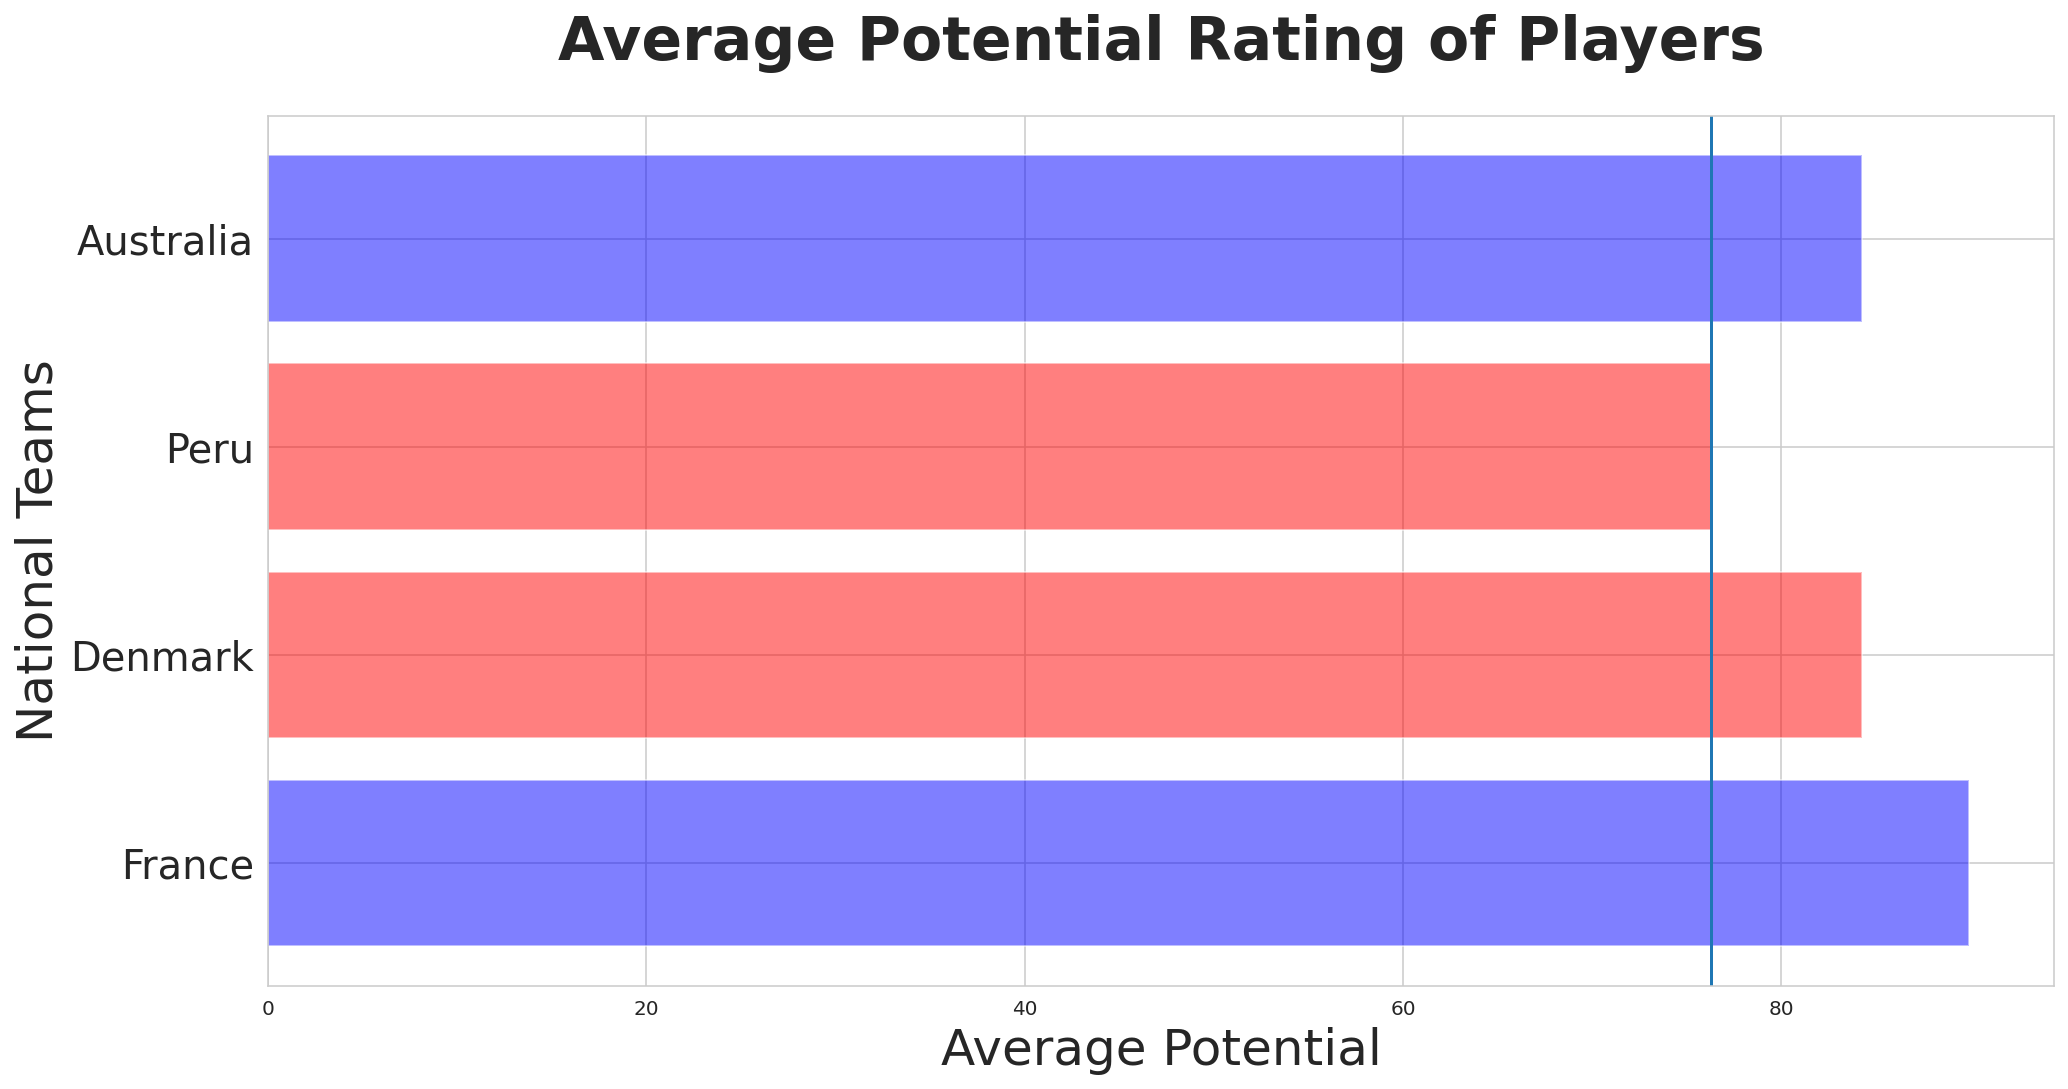

In [ ]:
index = np.arange(len(teams))
average_potential = [rating_442_FR_Potential, rating_433_DEN_Potential, rating_442_PER_Potential,rating_433_DEN_Potential]

plt.figure(figsize=(16,8))
plt.barh(index, average_potential, align='center',color='brrb', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.axvline(x=rating_442_PER_Potential)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Potential', fontsize=25)
plt.title('Average Potential Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

In [ ]:
GroupC_Average

,ValueNum,WageNum
Nationality,,
France,3.340557e+06,14279.141104
Denmark,1.596257e+06,7202.312139
Peru,2.178167e+06,6500.000000
Australia,7.339868e+05,4114.537445


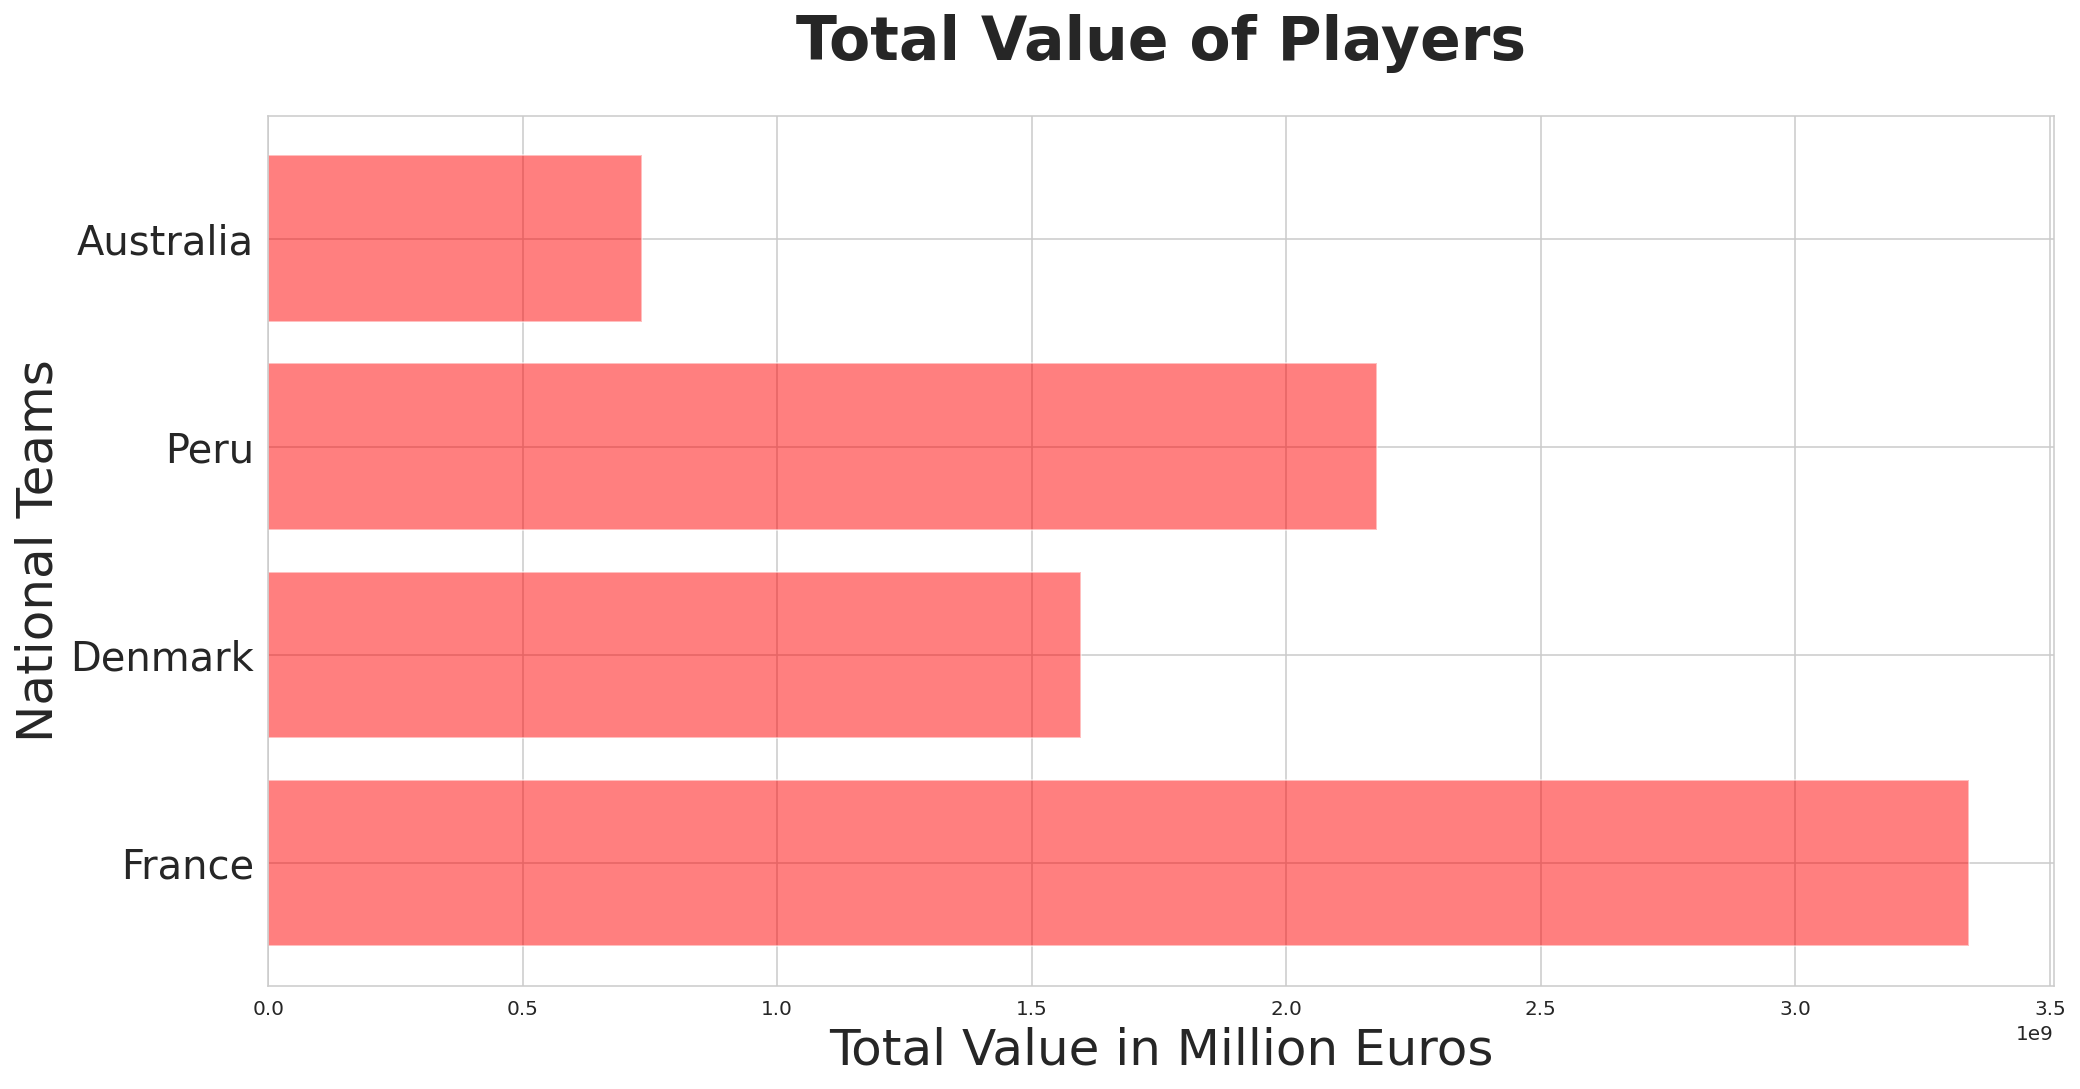

In [ ]:
total_value = GroupC_Average.ValueNum.values * 1000

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

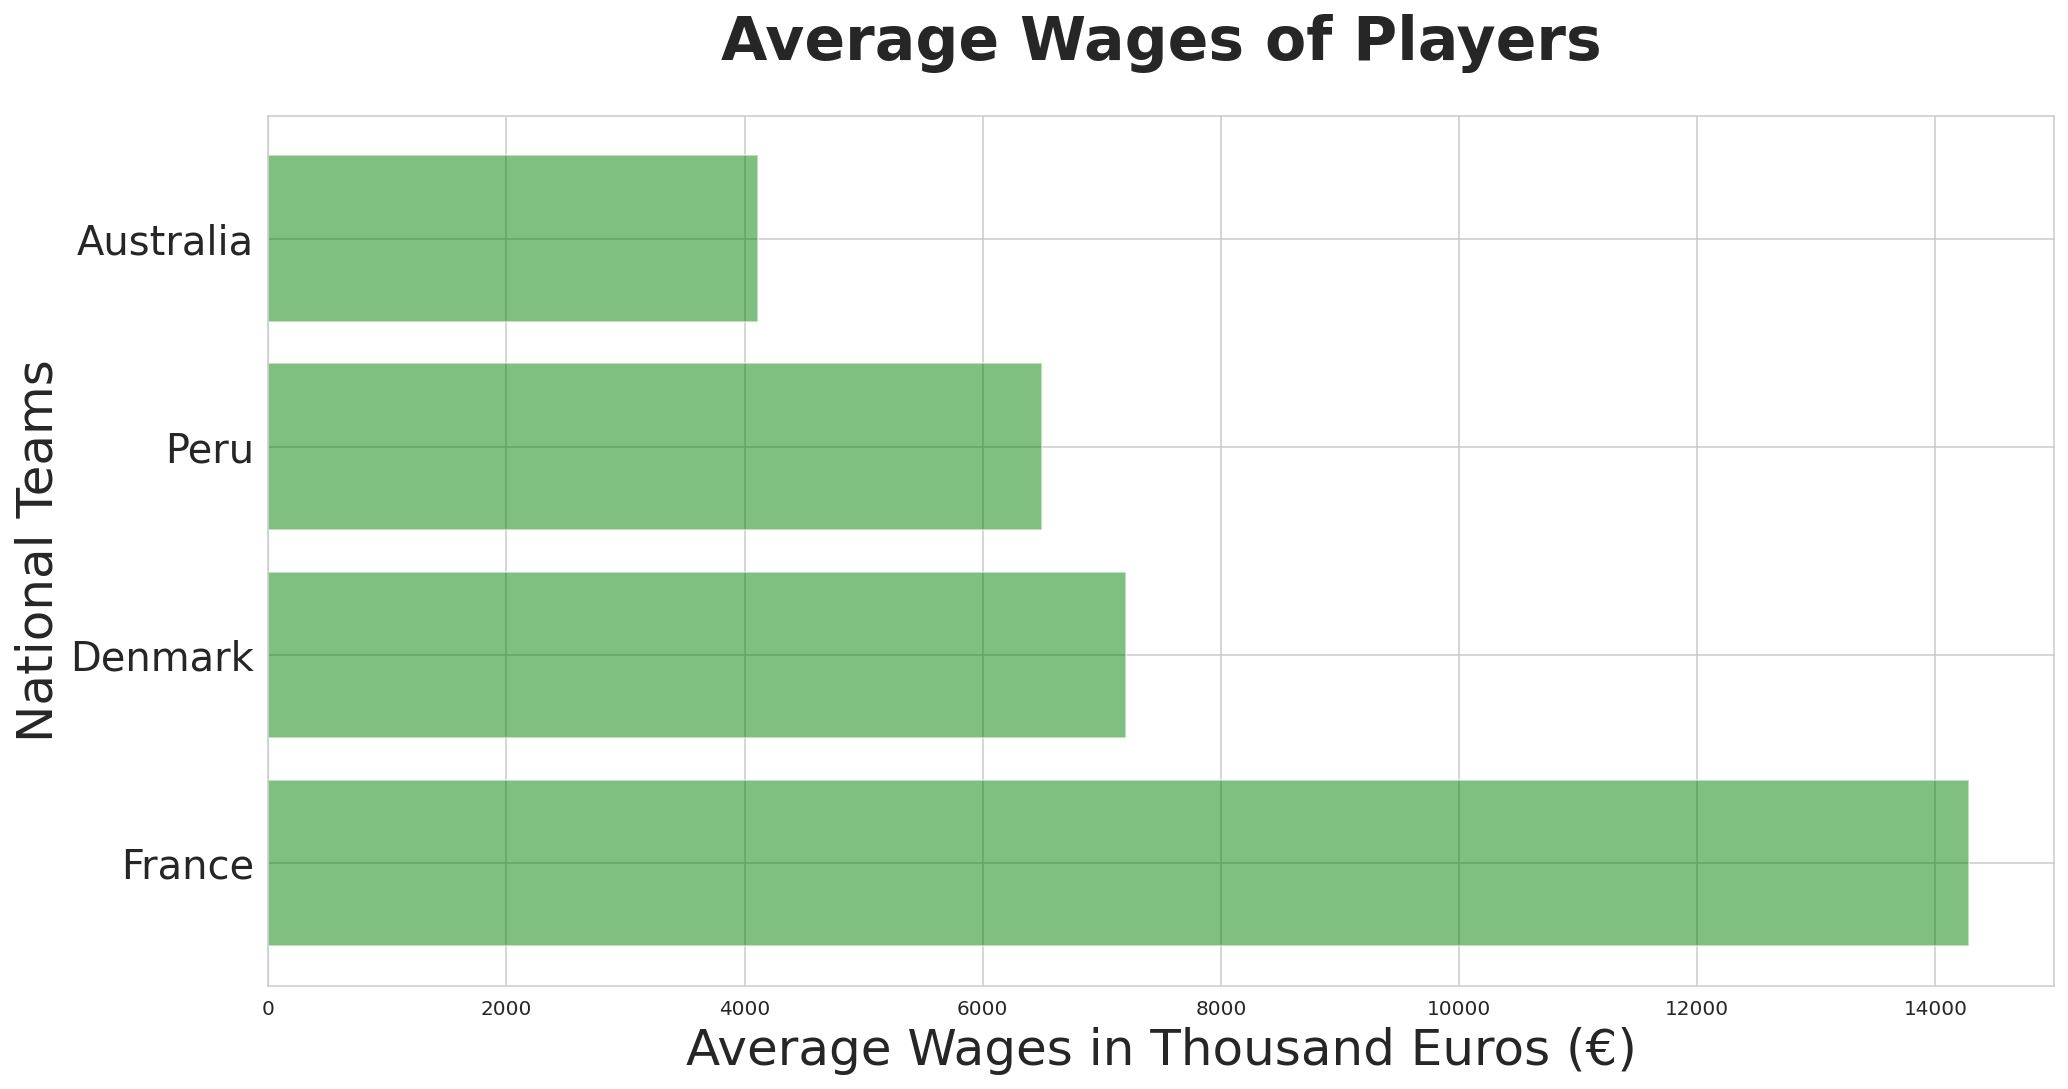

In [ ]:
average_wage = GroupC_Average.WageNum.values

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros (€)', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

# Conclusión
Basandonos en el análisis realizado:
* **Francia** tiene la máxima clasificación general media, seguido por **Australia y Dinamarca**. 
* **Francia** tiene el máximo score total, seguido by **Peru y Dinamarca**. 
* **Francia** tiene la recaudación máxima, seguido por **Peru**.

Mi apuesta es la siguiente: **Francia y Dinamarca** pasan a octavos de finales, en tercer puesto se encontraría **Perú** del Grupo.

Si les gusto compartantan este Notebook

## Copyright & License

BoostTag E.I.R.L. Romell D.Z. ([@romellfudi](rdominguez@boosttag.com))
All rights reserved

https://portfolio.romellfudi.com/

Copyright (c) 2018
MIT. See the LICENSE file for the copyright notice.